In [1]:
from IPython.display import display

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans

%matplotlib inline

In [2]:
df = pd.read_csv('../../data/candy.csv')

display(df.info())
display(df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


None

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936


In [3]:
x = df.drop(columns=['competitorname']).values
x

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 7.3199999e-01,
        8.6000001e-01, 6.6971725e+01],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.0399997e-01,
        5.1099998e-01, 6.7602936e+01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1000000e-02,
        1.1600000e-01, 3.2261086e+01],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 3.1299999e-01,
        3.1299999e-01, 4.4375519e+01],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.8600000e-01,
        2.6699999e-01, 4.1904308e+01],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.7199998e-01,
        8.4799999e-01, 4.9524113e+01]])

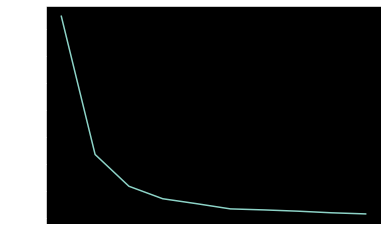

In [4]:
clusters = range(1,11)

elbow = [MiniBatchKMeans(n_clusters=cluster, batch_size=8).fit(x).inertia_ for cluster in clusters]

plt.plot(clusters, elbow)

In [5]:
kmeans = MiniBatchKMeans(n_clusters=3, batch_size=8)
df['cluster'] = kmeans.fit_predict(x)

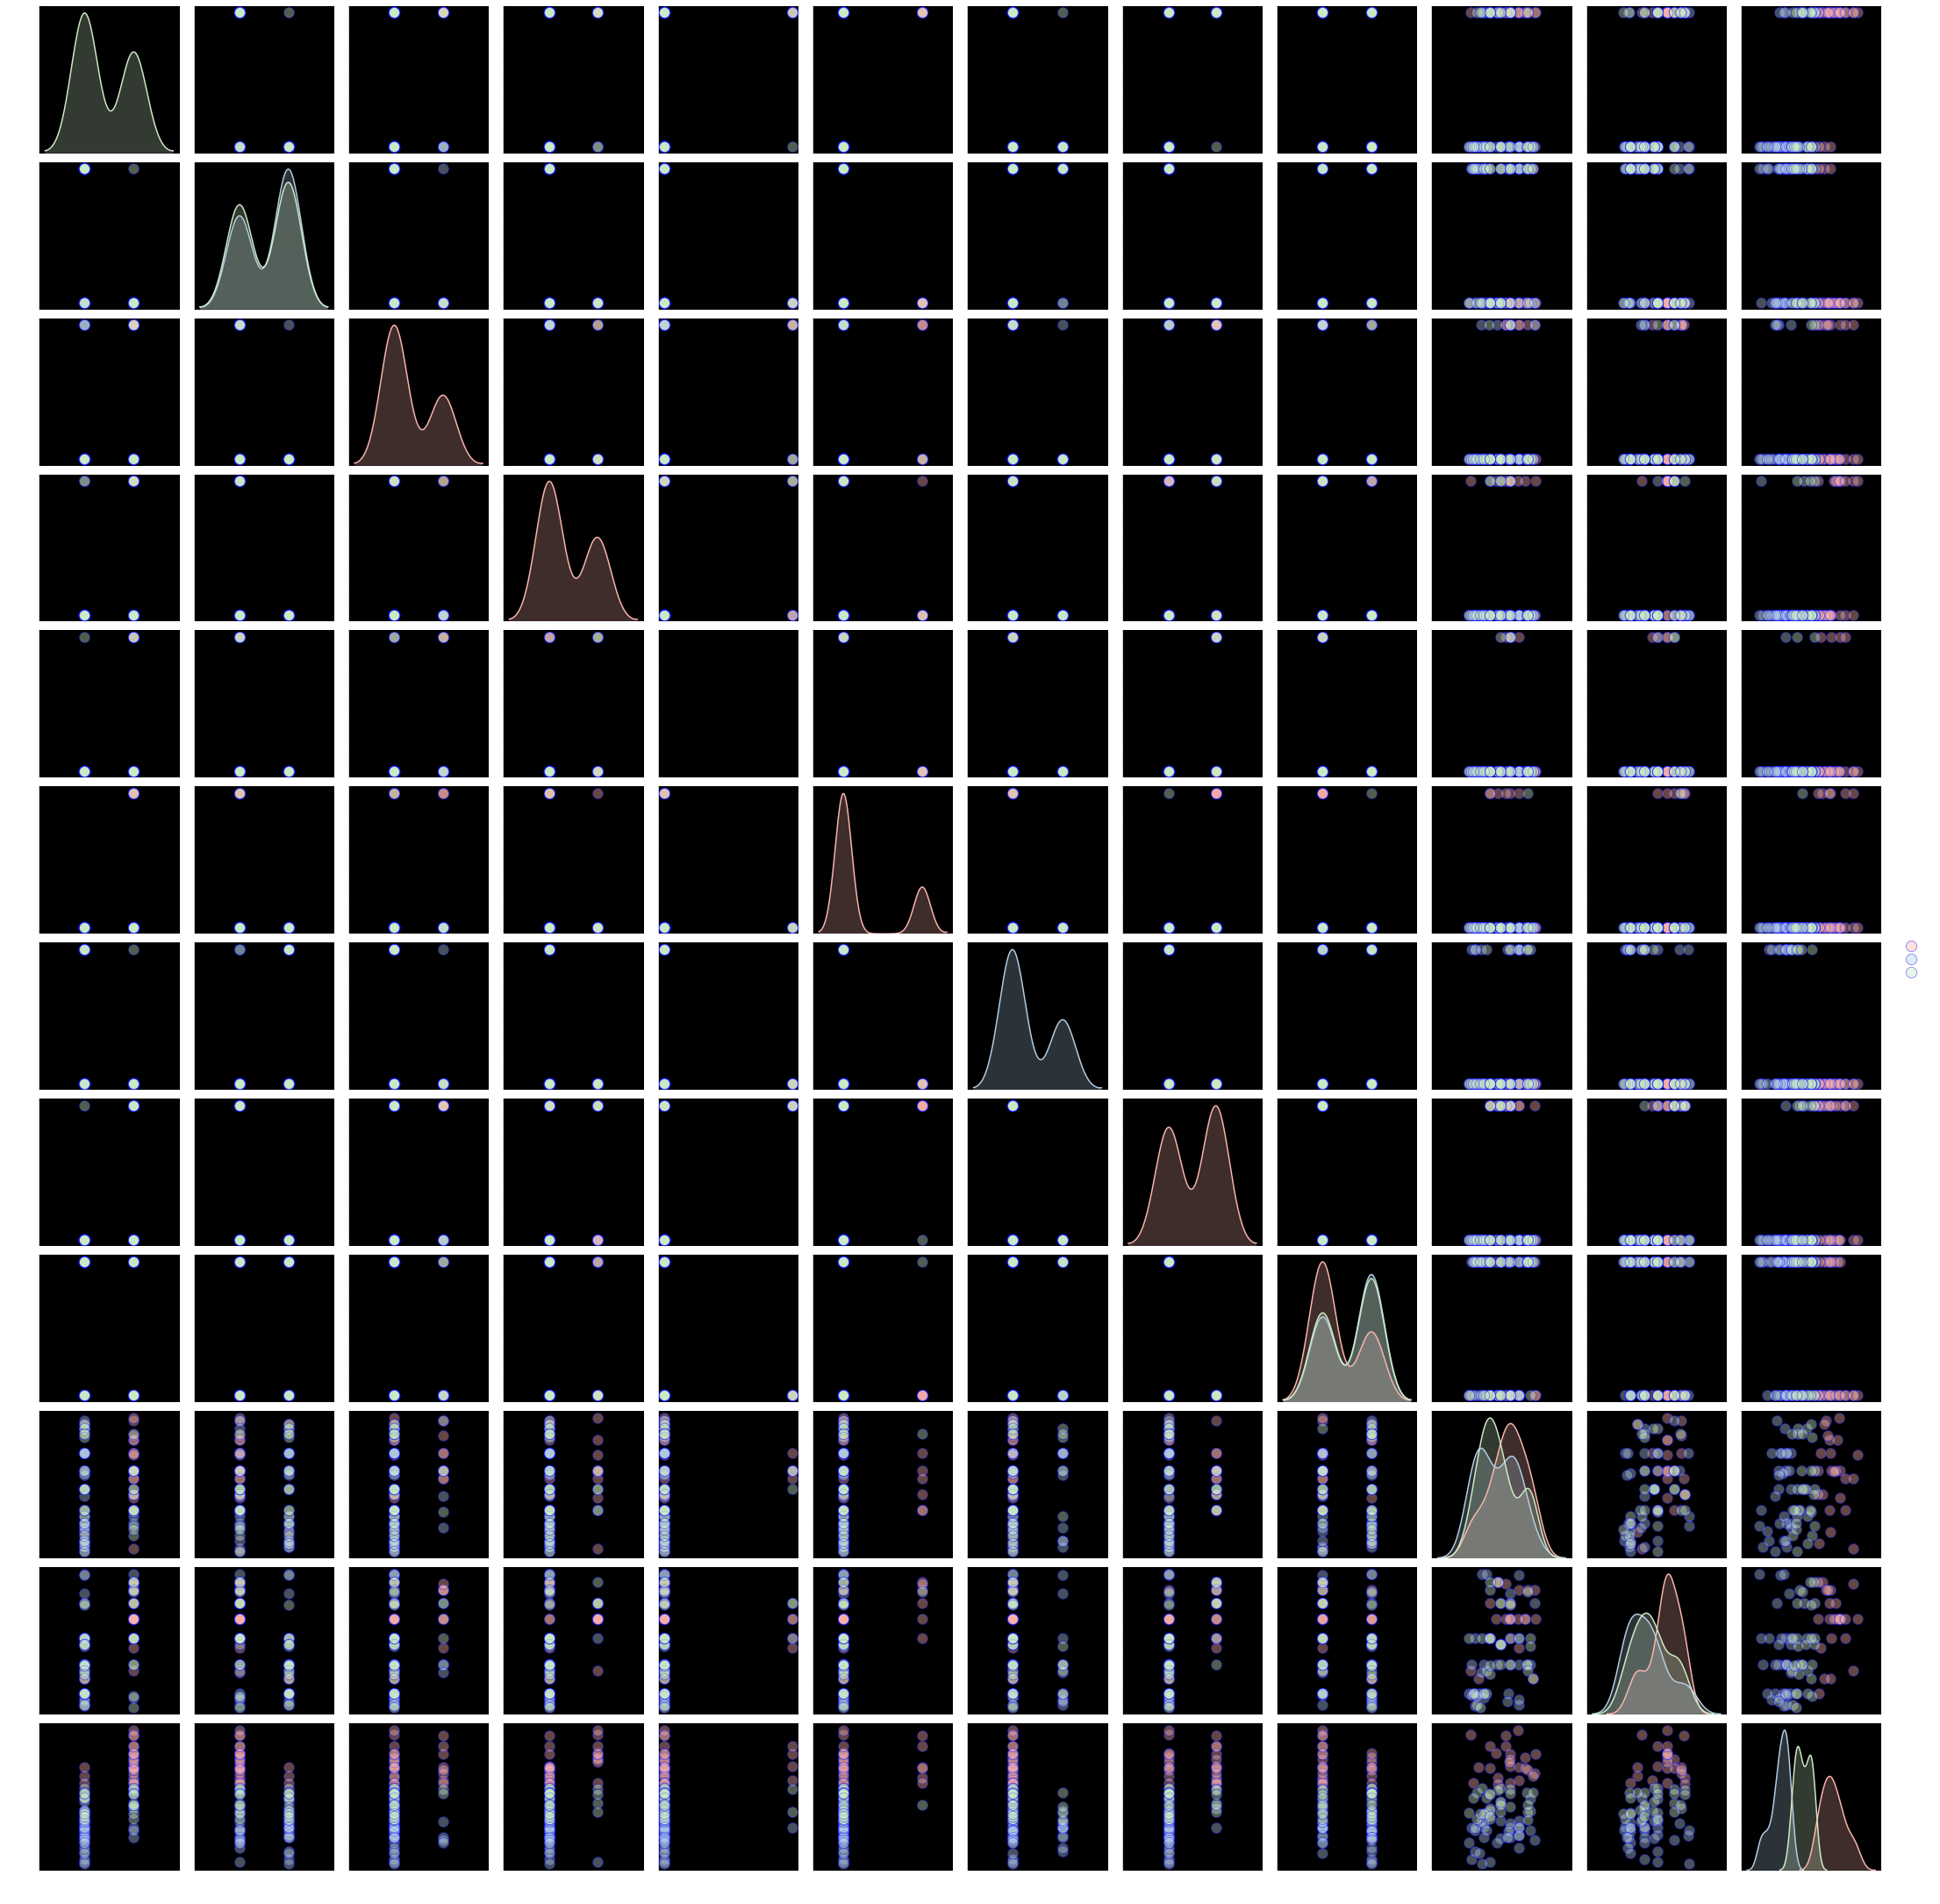

In [6]:
sns.pairplot(df, hue='cluster', palette='Pastel1', plot_kws=dict(s=200, edgecolor="w", linewidth=1, alpha=0.4))